In [123]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [124]:
db_path =r"..\databases\deliveroo.db"

In [125]:
# Connect to the SQLite database

connection = sqlite3.connect(db_path)

In [126]:
#Create a cursor object to interact with the database

cursor = connection.cursor()

In [127]:
# Fetch all table names in the database to understand its structure

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

In [128]:
# Close the connection to prevent any locks
connection.close()

In [129]:
# Display the tables found in the database
tables

[('locations',),
 ('restaurants',),
 ('categories',),
 ('menu_items',),
 ('locations_to_restaurants',)]

In [130]:
# Query to find the top 10 pizza restaurants 
# Reconnect to the SQLite database
connection = sqlite3.connect(db_path)
cursor = connection.cursor()

# Query to find the top 10 pizza restaurants
query = """
SELECT name, category, rating
FROM restaurants
WHERE name LIKE '%pizza%' OR category LIKE '%pizza%'
ORDER BY rating DESC
LIMIT 10;
"""
cursor.execute(query)
top_pizza_restaurants_refined = cursor.fetchall()

# Display the results
print(top_pizza_restaurants_refined)

# Close the connection
connection.close()


[('La Barchetta', 'Pizza', 4.6), ('Sforno', 'Pizza', 4.6), ('Pizza Hut Strombeek-Bever', 'Italian', 4.6), ("Luigi's", 'Pizza', 4.6), ('Tutti Atelier', 'Pizza', 4.5), ("That's Amore", 'Pizza', 4.5), ('Kalura', 'Pizza', 4.5), ('Plant a Pizza', 'Vegan', 4.5), ('Piano A apulian pizza', 'Pizza', 4.5), ('Pizza Hut', 'Italian', 4.4)]


In [131]:
# Convert the result into a DataFrame
columns = ['Name', 'Category', 'Rating']
df = pd.DataFrame(top_pizza_restaurants_refined, columns=columns)

In [132]:
# Close the connection
connection.close()

In [133]:
# Display the DataFrame
print(df)

                        Name Category  Rating
0               La Barchetta    Pizza     4.6
1                     Sforno    Pizza     4.6
2  Pizza Hut Strombeek-Bever  Italian     4.6
3                    Luigi's    Pizza     4.6
4              Tutti Atelier    Pizza     4.5
5               That's Amore    Pizza     4.5
6                     Kalura    Pizza     4.5
7              Plant a Pizza    Vegan     4.5
8      Piano A apulian pizza    Pizza     4.5
9                  Pizza Hut  Italian     4.4


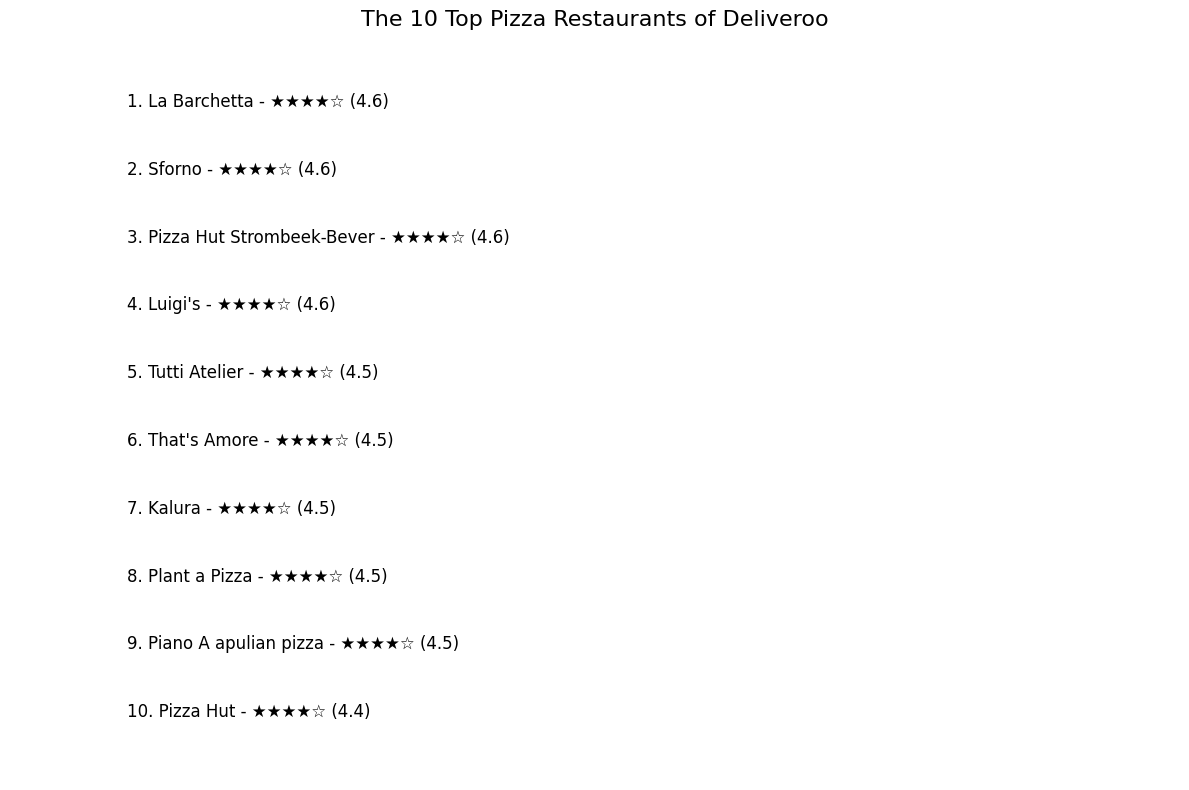

In [ ]:
plt.figure(figsize=(12, 8))

# Iterate over the DataFrame to add sequential numbering from 1 to 10
for i, row in df.iterrows():
    plt.text(
        0.1, 
        len(df) - 1 - i,  # Adjust for proper positioning from top to bottom
        f"{i + 1}. {row['Name']} - {create_star_rating_with_text(row['Rating'])} ({row['Rating']})", 
        fontsize=12, 
        color="black",
        verticalalignment="center"
    )

# Add a title to the visualization
plt.title("The 10 Top Pizza Restaurants of Deliveroo", fontsize=16)

# Turn off axes for a clean visual
plt.gca().axis("off")
plt.gca().set_ylim(-1, len(df))  


plt.tight_layout()
plt.show()
